In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Chocolatina's album problem"

How many sheets on average should an agent buy to fill its album?

699
0


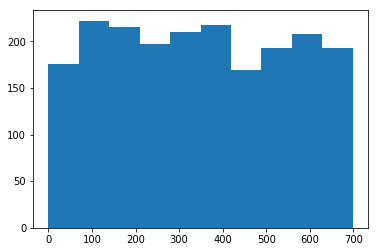

In [2]:
from random_generator import RandomGenerator

rg = RandomGenerator('uniform', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

699
0


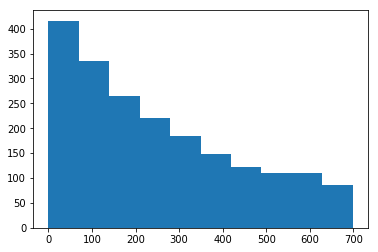

In [3]:
rg = RandomGenerator('exponential', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

8
0


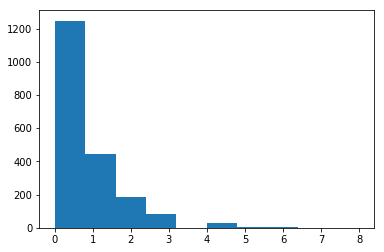

In [4]:
rg = RandomGenerator('custom', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

## Data analysis

In [5]:
df = pd.read_csv("data/data.csv")
df.head()

,distribution,time,sheets,id,friends,surplus,purchased,agents,full_agents,stage
0,exponential,75,20,0,0,56,76,2,1,buy
1,exponential,169,20,1,2,150,170,2,2,buy
2,exponential,27,10,0,0,18,28,2,1,buy
3,exponential,113,10,1,2,104,114,2,2,buy
4,exponential,63,20,2,0,44,64,5,1,buy


In [37]:
exp = df[df['distribution'] == 'exponential']
uni = df[df['distribution'] == 'uniform']

In [38]:
exp.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,2105.356828,300.414097,16.895154,32.535683,1935.251101,2106.356828,33.461674,17.596476
std,3728.647806,410.622732,13.471589,21.163975,3529.795659,3728.647806,16.003254,13.641194
min,9.000000,10.000000,0.000000,0.000000,4.000000,10.000000,2.000000,1.000000
25%,172.000000,50.000000,5.000000,14.000000,153.000000,173.000000,20.000000,6.000000
50%,703.000000,100.000000,14.000000,29.000000,625.000000,704.000000,30.000000,15.000000
75%,2168.000000,400.000000,26.000000,52.000000,1933.000000,2169.000000,50.000000,27.000000
max,35025.000000,1400.000000,49.000000,76.000000,34258.000000,35026.000000,50.000000,50.000000


In [21]:
uni.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1069.861833,441.381669,17.619699,33.254446,823.722298,1070.861833,33.937073,17.820793
std,1335.979924,397.317899,14.480799,22.507371,1149.033675,1335.979924,17.416537,14.471300
min,8.000000,10.000000,0.000000,0.000000,4.000000,9.000000,2.000000,1.000000
25%,146.000000,100.000000,5.000000,13.000000,96.500000,147.000000,20.000000,5.000000
50%,650.000000,400.000000,14.000000,32.000000,509.000000,651.000000,30.000000,14.000000
75%,1354.500000,700.000000,28.000000,53.000000,980.000000,1355.500000,50.000000,28.000000
max,9739.000000,1400.000000,49.000000,76.000000,8340.000000,9740.000000,50.000000,50.000000


Text(0.5, 0.98, 'Distribución de los tiempos de la simulación')

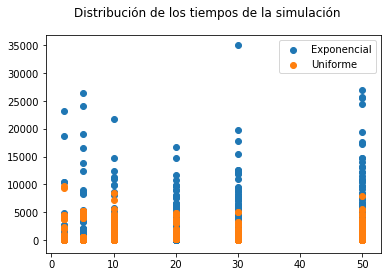

In [9]:
plt.scatter(exp['agents'], exp['time'], label="Exponencial")
plt.scatter(uni['agents'], uni['time'], label="Uniforme")
plt.legend()
plt.suptitle("Distribución de los tiempos de la simulación")

In [10]:
agents = df['agents'].unique()
distributions = df['distribution'].unique()
sheets = df['sheets'].unique()

In [11]:
exp[(exp['agents'] == 2) | (exp['agents'] == 10) | (exp['agents'] == 50)][["purchased", "time", "surplus", "friends", "agents", "sheets", "distribution"]].groupby(['agents', 'distribution', 'sheets']).describe()

purchased                                      \
                               count          mean          std      min   
agents distribution sheets                                                 
2      exponential  10           4.0     71.000000    49.652123     28.0   
                    20           2.0    123.000000    66.468037     76.0   
                    50           4.0    508.000000    73.900834    444.0   
                    100          2.0   1114.500000   166.170094    997.0   
                    200          4.0   2261.500000   560.607111   1776.0   
                    400          2.0   4656.500000   279.307179   4459.0   
                    700          2.0  10369.500000    13.435029  10360.0   
                    1400         2.0  20959.500000  3226.528243  18678.0   
10     exponential  10          10.0     78.700000    86.127877     19.0   
                    20           8.0    125.375000    61.103980     53.0   
                    50          20.0    423.000000   308.069712    139.0   
                    100          9.0    667.777778   495.753663    314.0   
                    200         20.0   1797.400000  1522.589913    629.0   
                    400          9.0   2860.666667  1281.148801   1624.0   
                    700          9.0   5415.444444  3674.735300   2753.0   
                    1400         9.0  10938.444444  4712.998491   5840.0   
50     exponential  10          80.0     75.375000    57.792158     12.0   
                    20          43.0    121.697674    87.696591     24.0   
                    50          94.0    395.021277   275.872301     81.0   
                    100         43.0    715.162791   688.622536    228.0   
                    200         88.0   1082.340909   668.138878    361.0   
                    400         47.0   2645.531915  2297.661267    941.0   
                    700         47.0   4386.021277  3072.633564   1723.0   
                    1400        46.0   9515.521739  6325.585347   4013.0   

                                                                  time  \
                                 25%      50%       75%      max count   
agents distribution sheets                                               
2      exponential  10         28.00     71.0    114.00    114.0   4.0   
                    20         99.50    123.0    146.50    170.0   2.0   
                    50        444.00    508.0    572.00    572.0   4.0   
                    100      1055.75   1114.5   1173.25   1232.0   2.0   
                    200      1776.00   2261.5   2747.00   2747.0   4.0   
                    400      4557.75   4656.5   4755.25   4854.0   2.0   
                    700     10364.75  10369.5  10374.25  10379.0   2.0   
                    1400    19818.75  20959.5  22100.25  23241.0   2.0   
10     exponential  10         25.25     52.5     89.25    305.0  10.0   
                    20         88.75    115.0    154.25    214.0   8.0   
                    50        227.00    308.0    517.00   1188.0  20.0   
                    100       361.00    468.0    654.00   1820.0   9.0   
                    200       722.00   1319.5   1762.00   5518.0  20.0   
                    400      1953.00   2151.0   4121.00   5155.0   9.0   
                    700      3166.00   3652.0   5467.00  12390.0   9.0   
                    1400     8500.00   9832.0  11252.00  21722.0   9.0   
50     exponential  10         31.50     54.5    103.75    232.0  80.0   
                    20         52.50     93.0    175.50    335.0  43.0   
                    50        168.25    304.0    533.50   1230.0  94.0   
                    100       349.50    467.0    763.00   3493.0  43.0   
                    200       738.75    882.0   1179.25   4364.0  88.0   
                    400      1384.50   1659.0   2697.00  13047.0  47.0   
                    700      2524.50   3579.0   4617.50  17690.0  47.0   
                    1400     5214.50   6458.0  122

In [12]:
uni[(uni['agents'] == 2) | (uni['agents'] == 10) | (uni['agents'] == 50)][["purchased", "time", "surplus", "friends", "agents", "sheets", "distribution"]].groupby(['agents', 'distribution', 'sheets']).describe()

purchased                                    \
                               count         mean          std     min   
agents distribution sheets                                               
2      uniform      10           2.0    34.500000    10.606602    27.0   
                    20           4.0    53.000000     6.928203    47.0   
                    50           2.0   199.000000    32.526912   176.0   
                    100          4.0   429.000000    94.685444   347.0   
                    200          2.0   957.000000    82.024387   899.0   
                    400          2.0  2210.000000   294.156421  2002.0   
                    700          6.0  4216.000000   392.169351  3858.0   
                    1400         2.0  9548.500000   270.821897  9357.0   
10     uniform      10           6.0    15.166667     7.194906     9.0   
                    20          16.0    52.875000    38.437612    20.0   
                    50          10.0   121.200000    62.303558    65.0   
                    100         18.0   301.333333   206.025127   152.0   
                    200          9.0   548.333333   156.040860   318.0   
                    400          9.0  1339.333333   899.716205   635.0   
                    700         30.0  2455.300000   862.300298  1490.0   
                    1400        10.0  4876.200000  1770.558468  2894.0   
50     uniform      10          10.0    13.900000     3.665151     9.0   
                    50          25.0    74.680000    19.582560    52.0   
                    100         68.0   157.352941    60.955027   109.0   
                    200         37.0   306.054054    92.533761   222.0   
                    400         41.0   724.926829   376.124008   461.0   
                    700        135.0  1280.688889   706.679987   859.0   
                    1400        45.0  2589.733333  1248.379903  1642.0   

                                                               time  \
                                25%     50%      75%     max  count   
agents distribution sheets                                            
2      uniform      10        30.75    34.5    38.25    42.0    2.0   
                    20        47.00    53.0    59.00    59.0    4.0   
                    50       187.50   199.0   210.50   222.0    2.0   
                    100      347.00   429.0   511.00   511.0    4.0   
                    200      928.00   957.0   986.00  1015.0    2.0   
                    400     2106.00  2210.0  2314.00  2418.0    2.0   
                    700     3858.00  4216.0  4574.00  4574.0    6.0   
                    1400    9452.75  9548.5  9644.25  9740.0    2.0   
10     uniform      10        11.25    13.0    15.50    29.0    6.0   
                    20        30.25    38.5    62.75   142.0   16.0   
                    50        77.75    95.0   147.25   251.0   10.0   
                    100      172.00   201.0   366.00   808.0   18.0   
                    200      455.00   551.0   671.00   799.0    9.0   
                    400      831.00  1007.0  1154.00  3364.0    9.0   
                    700     1699.00  2375.0  2947.00  4228.0   30.0   
                    1400    3947.50  4403.0  5354.50  8515.0   10.0   
50     uniform      10        11.25    13.5    15.75    20.0   10.0   
                    50        60.00    68.0    84.00   122.0   25.0   
                    100      121.00   137.5   171.00   426.0   68.0   
                    200      253.00   273.0   318.00   651.0   37.0   
                    400      513.00   573.0   754.00  2016.0   41.0   
                    700      928.00   992.0  1326.00  4553.0  135.0   
                    1400    1921.00  2061.0  2733.00  7977.0   45.0   

                                         ...  surplus         friends  \
                                   mean  ...      75%     max   count   
agents distribution sheets               ...                            
2      uniform      10        33.500

In [13]:
exp = exp[(exp['agents'] == 2) | (exp['agents'] == 10) | (exp['agents'] == 50)][["purchased", "surplus", "agents", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets']).mean()
exp

purchased       surplus
agents distribution sheets                            
2      exponential  10         71.000000     61.000000
                    20        123.000000    103.000000
                    50        508.000000    458.000000
                    100      1114.500000   1014.500000
                    200      2261.500000   2061.500000
                    400      4656.500000   4256.500000
                    700     10369.500000   9669.500000
                    1400    20959.500000  19559.500000
10     exponential  10         78.700000     70.800000
                    20        125.375000    109.875000
                    50        423.000000    389.300000
                    100       667.777778    605.111111
                    200      1797.400000   1668.700000
                    400      2860.666667   2613.000000
                    700      5415.444444   4994.444444
                    1400    10938.444444  10097.555556
50     exponential  10         75.375000     68.475000
                    20        121.697674    109.790698
                    50        395.021277    365.936170
                    100       715.162791    660.348837
                    200      1082.340909    975.136364
                    400      2645.531915   2434.170213
                    700      4386.021277   4024.255319
                    1400     9515.521739   8793.000000

In [14]:
uni = uni[(uni['agents'] == 2) | (uni['agents'] == 10) | (uni['agents'] == 50)][["purchased", "surplus", "agents", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets']).mean()
uni

purchased      surplus
agents distribution sheets                          
2      uniform      10        34.500000    24.500000
                    20        53.000000    33.000000
                    50       199.000000   149.000000
                    100      429.000000   329.000000
                    200      957.000000   757.000000
                    400     2210.000000  1810.000000
                    700     4216.000000  3516.000000
                    1400    9548.500000  8148.500000
10     uniform      10        15.166667     8.833333
                    20        52.875000    38.750000
                    50       121.200000    88.800000
                    100      301.333333   238.666667
                    200      548.333333   424.777778
                    400     1339.333333  1096.666667
                    700     2455.300000  2036.100000
                    1400    4876.200000  4029.000000
50     uniform      10        13.900000     7.600000
                    50        74.680000    47.200000
                    100      157.352941   103.117647
                    200      306.054054   200.648649
                    400      724.926829   517.219512
                    700     1280.688889   919.733333
                    1400    2589.733333  1869.866667

In [15]:
agg = df[["time", "surplus", "agents", "purchased", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets'])
final = agg.mean()
final

time       surplus     purchased
agents distribution sheets                                          
2      exponential  10         70.000000     61.000000     71.000000
                    20        122.000000    103.000000    123.000000
                    50        507.000000    458.000000    508.000000
                    100      1113.500000   1014.500000   1114.500000
                    200      2260.500000   2061.500000   2261.500000
                    400      4655.500000   4256.500000   4656.500000
                    700     10368.500000   9669.500000  10369.500000
                    1400    20958.500000  19559.500000  20959.500000
       uniform      10         33.500000     24.500000     34.500000
                    20         52.000000     33.000000     53.000000
                    50        198.000000    149.000000    199.000000
                    100       428.000000    329.000000    429.000000
                    200       956.000000    757.000000    957.000000
                    400      2209.000000   1810.000000   2210.000000
                    700      4215.000000   3516.000000   4216.000000
                    1400     9547.500000   8148.500000   9548.500000
5      exponential  10         81.000000     72.000000     82.000000
                    20         91.400000     72.400000     92.400000
                    50        526.600000    477.600000    527.600000
                    100      1209.000000   1110.000000   1210.000000
                    200      2564.000000   2365.000000   2565.000000
                    400      4283.600000   3884.600000   4284.600000
                    700      9360.400000   8661.400000   9361.400000
                    1400    19992.000000  18593.000000  19993.000000
       uniform      20         69.000000     50.000000     70.000000
                    100       492.000000    393.000000    493.000000
                    700      4670.600000   3971.600000   4671.600000
10     exponential  10         77.700000     70.800000     78.700000
                    20        124.375000    109.875000    125.375000
                    50        422.000000    389.300000    423.000000
...                                  ...           ...           ...
20     exponential  700      4474.947368   4090.842105   4475.947368
                    1400     8404.222222   7644.500000   8405.222222
       uniform      100       237.222222    184.000000    238.222222
                    700      2095.250000   1713.150000   2096.250000
30     exponential  10         83.600000     77.320000     84.600000
                    20        124.862069    113.724138    125.862069
                    50        414.448276    385.931034    415.448276
                    100       691.703704    637.148148    692.703704
                    200      1280.142857   1170.892857   1281.142857
                    400      2562.137931   2350.586207   2563.137931
                    700      4454.214286   4089.035714   4455.214286
                    1400     9481.178571   8745.964286   9482.178571
       uniform      20         36.833333     26.055556     37.833333
                    100       208.136364    152.863636    209.136364
                    700      1617.769231   1244.807692   1618.769231
50     exponential  10         74.375000     68.475000     75.375000
                    20        120.697674    109.790698    121.697674
                    50        394.021277    365.936170    395.021277
                    100       714.162791    660.348837    715.162791
                    200      1081.340909    975.136364   1082.340909
                    400      2644.531915   2434.170213   2645.531915
                    700      4385.021277   4024.255319   4386.021277
                    1400     9514.521739   8793.000000   9515.521739
       uniform      10         12.900000      7.600000     13.900000
                    50         73.680000     47.200000     74.680000
                    100       156.

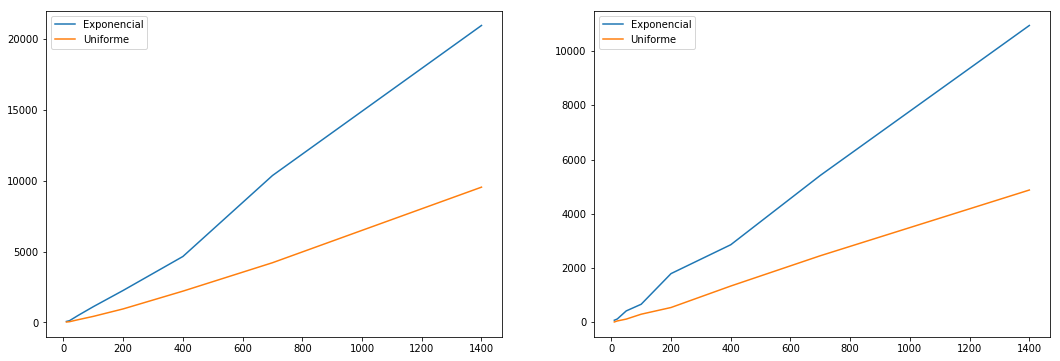

In [97]:
agents = [2, 10]
figs, axs = plt.subplots(1, 2, figsize=(18,6))
_uni = uni.reset_index()
_exp = exp.reset_index()
    
for (i, agent) in enumerate(agents):
    _uni_p = _uni[_uni["agents"] == agent]
    _uni_p = _uni_p[["sheets", "purchased"]].groupby("sheets").mean()
    _exp_p = _exp[_exp["agents"] == agent]
    _exp_p = _exp_p[["sheets", "purchased"]].groupby("sheets").mean()

    axs[i].plot(_exp_p.index, _exp_p["purchased"], label="Exponencial")
    axs[i].plot(_uni_p.index, _uni_p["purchased"], label="Uniforme")
    axs[i].legend()

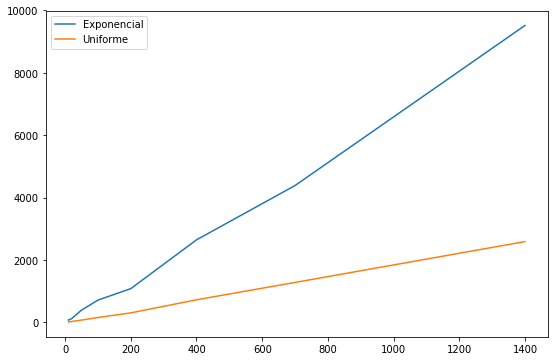

In [100]:
agents = [50]
figs, axs = plt.subplots(1, 1, figsize=(9,6))
_uni = uni.reset_index()
_exp = exp.reset_index()
    
for (i, agent) in enumerate(agents):
    _uni_p = _uni[_uni["agents"] == agent]
    _uni_p = _uni_p[["sheets", "purchased"]].groupby("sheets").mean()
    _exp_p = _exp[_exp["agents"] == agent]
    _exp_p = _exp_p[["sheets", "purchased"]].groupby("sheets").mean()

    axs.plot(_exp_p.index, _exp_p["purchased"], label="Exponencial")
    axs.plot(_uni_p.index, _uni_p["purchased"], label="Uniforme")
    axs.legend()